# Регрессия

В случае задач машинного обучения с учителем существует какое-то количество размеченных данных, данных, для
которых определен корректный ответ и корректное предсказание. Мы пытаемся обучить нашу модель на этих данных и потом сделать предсказание на новых данных, которых мы еще не видели.
Далее когда поступают новые данные, не размеченные, наша обученная модель пытается предсказать для них ответ.

В этом разделе мы посмотрим на одну из задач машинного обучения с учителем - это задача регрессии.

**Задача регрессии** (прогнозирования) – построение модели, способной предсказывать численную величину на основе набора признаков объекта.

**Регрессия. Постановка задачи.**

Есть обучающая выборка, в которой представлены объекты в виде из признакового описания (вектор признаков) и значения целевой переменной (непрерывная переменная).

Алгоритм регрессии дл каждого нового объекта (его признакового описания) прогнозирует значение целевой переменной.

**Примеры задач регресии:**
- Оценка стоимости недвижимости: по характеристике
района, экологической обстановке, транспортной
связности оценить стоимость жилья
- Прогноз свойств соединений: по параметрам
химических элементов спрогнозировать температуру
плавления, электропроводность, теплоемкость
получаемого соединения
- Медицина: по постоперационным показателям оценить
время заживления органа
- Кредитный скоринг: по анкете заемщика оценить
величину кредитного лимита
- Инженерное дело: по техническим характеристикам
автомобиля и режиму езды спрогнозировать расход
топлива

**Ответ в задачах регресии является числовым из непрерывного диапазона, в отличии от задач классификации, где ответ дискретный.**

## Линейные методы регрессии

Любые линейные методы регресии (да и классификации) подразумевают наличие линейной зависимости в данных, иначе их бесполезно использовать.

### Линейная регрессия

**Линейная регрессия** - самый простой инструмент выявления зависимости между различными числовыми признакми. Часто линейную регрессию относят к методам машинного обучения, однако на самом деле - это не так.

Восстановить линейную ргрессию - то есть линейную зависимость между различными числовыми данными - можно с помощью аналитического решения.

Тем не менее, так как линейная ргрессия решает ту же задачу, что и машинное обучение - задачу восстановления зависимости между данными - для регрессии применяются те же термины и понятия, что и для машинного обучения.

#### Базовые понятия, используемые в машинном обучении

Центральным понятием машинного обучения является _обучающая выборка_. Это примеры, на основе которых планируется строить общую закономерность. Она обозначается $X$ и состоит из $l$ пар объектов $x_{i}$ и известных ответов $y_{i}$:

$$X = (x_{i}, y_{i})^l_{i=1}.$$

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, позволяющая делать предсказания, называется _алгоритмом_ или _моделью_ и обозначается $a(x)$. Она принимает на вход объект и выдает ответ.

Отметим, что $ x_{i} = (x^{1}, x^{2}, ..., x^{d}) $. То есть каждый объект $x_{i}$ состоит из ряда различных значений.

Для начала введём проствую базовую линейную модель, записанную следующим образом:

$$a(x) = w_{0} + w_{1}x^{1} + ... + w_{d}x^{d} = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$

Параметрами модели $a(x)$ являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_, _сдвигом_ или _смещением_. Оптимизация модели заключается в подборе оптимальных значений весов. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:

$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$

Чтобы сделать модель однородной и упростить оптимизацию вводится фиктивный признак $x^{0}$ всегда равный единице. Таким образом:

$$a(x) = \left \langle w,x \right \rangle = \sum^{d}_{i=0}w_{i}x^{i} $$

#### Функционал ошибки

Для обучения модели и сравнения различных моделей между собой необходимо разработать математическую формулу и алгоритм расчёта ошибки модели. В рамках решения задачи оптимизации обычно ставится задача достижения минимального значения функционала ошибки.

В качестве очевидного решения можно предложить такую формулу:
$Q(a,y)=a(x)-y$. Однако, у неё есть принципиальная проблема: у такой функции не существует минимума.

С учётом этого, логичным кажется решение использовать в качестве функции для расчёта ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = MAE = \frac{1}{N}\sum^{N}_{i=1}|a(x_{i})-y_{i}|.$$


$N$- это количество объектов.

Однако, мы уже разбирали, что функционал ошибки или функция потерь, должны быть дифференцируемы, а значит, необходимо предложить другой вариант базовой функции для расчёта ошибки: $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = MSE = \frac{1}{N}\sum^{N}_{i=1}(a(x_{i})-y_{i})^{2}.$$

#### Вывод аналитической формулы для решения линейной регрессии

Таким образом, задача расчёт оптимальных коэффициентов математически может быть записана следующим образом.

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Если вас смущает возникшая, казалось бы путаница, между различными записями, то целесообразно ввести матричную запись признаков:

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\
... & ... & ...\\
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

$$y = \begin{pmatrix}
y_{1}\\
...\\
y_{l}
\end{pmatrix}.$$

Таким образом, задача начинает выглядеть следующим образом

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

Взяв производную (от матрицы (!)) и прировняв её к нулю (точка экструма квадратинчной функции) можно получить значения коэффициентов:

$$w = (X^{T}X)^{-1}X^{T}y.$$

Если вам интересна более детальная математическая подоплёка смотрите её тут: [Вывод аналитической формулы решения уравнения линейной регрессии](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) (см. пункт 1.2)

**Таким образом, нетрудно догадаться, что в идеальном случае MAE и MSE будут равны 0.**

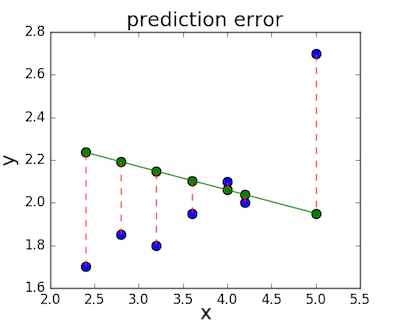

- зеленые точки - это $\\ \bar{y_t}$ - предсказание
- синие точки - это $\\ y_t $ - правильный ответ
- T = 7 - это общее число наблюдений (точек)

Вычислим MSE для каждой из трех функций выше:
- первая функция дает **MSE = 0,17**
- вторая **MSE = 0,08**
- третья **MSE = 0,02**

Неудивительно, что третья функция имеет самую низкую MSE, подтверждая нашу догадку, что это линия наилучшего соответствия.
В идеальном случае, когда все ответы предсказаны точно, MSE будет равна **нулю**.

Коэффициент детерминации $R2$, или $R-квадрат$, варьируется в интервале между 0 и 1 и обозначает объяснительную мощность линейной регрессионной модели. Он вычисляет объясненную долю изменчивости в зависимой переменной. (или если по-простому, $R2$ показывают насколько признаки влияют/коррелируют с ответом).

Обычно, чем ближе $R2$ к 1, тем лучше линия регрессии подогнана к точкам данных и больше изменчивости в $Y$ объясняется независимой переменной $X$.

*P.s. $R2$ может быть и отрицательным, это значит ваша модель работает хуже, чем простое усреднение результата.*

### Простой пример линейной регрессии

In [ ]:
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
# Определим простейший набор данных
# Шесть пар точек (5,5), (15,20), (25, 14), (35, 32), (45, 22), (55, 38)

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
# reshape -> [[5],[15],[25]...] - т.е многомерность
y = np.array([5, 20, 14, 32, 22, 38])

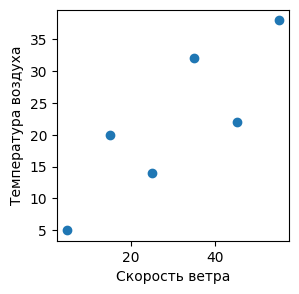

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))

ax.scatter(x, y)
plt.xlabel("Скорость ветра")
plt.ylabel("Температура воздуха")

plt.show()

**Цель линейной регрессии** — поиск линии, которая наилучшим образом соответствует этим точкам.

Общее уравнение для прямой (в том случае если у нас один признак для каждого объекта):

 $\\ f (x) = w_1*x + w_0 $,

где $\\ w_1 $ — наклон линии, а $\\ w_0 $ — его y-сдвиг. Таким образом, решение линейной регрессии определяет значения для $\\ w_1 $ и $\\ w_0 $, так что f (x) приближается как можно ближе к y.

Попробуем несколько случайных кандидатов:

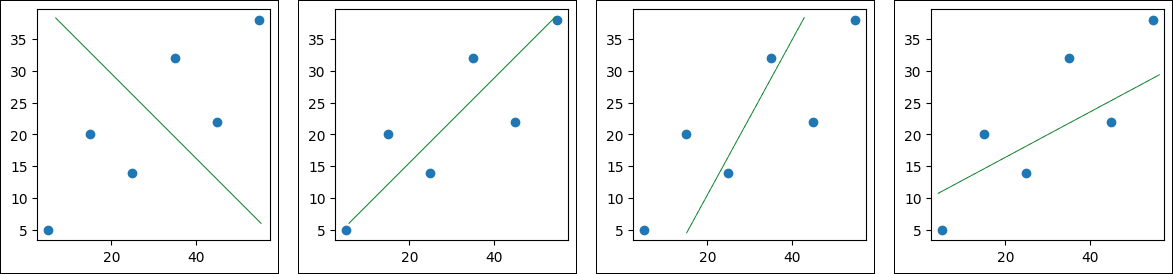

In [ ]:
# Создаем модель линейной регрессии - т.е. прямой которая будет проходить через наши точки
# Эта операция создаёт переменную model в качестве экземпляра LinearRegression

lin_reg = LinearRegression()

In [ ]:
# С помощью метода fit() применяем нашу модель к нашему набору данных - обучем модель
# С помощью .fit() вычисляются оптимальные значение весов w₀ и w₁ и т.д,
# используя существующие вход и выход (x и y) в качестве аргументов.

lin_reg.fit(x, y)

LinearRegression()

In [ ]:
w0 = model.intercept_
w0

5.633333333333329

In [ ]:
w1 = model.coef_
w1

array([0.54])

$$ y = w_{0} + w_{1}x $$
$$ y = 5.63 + 0.54*x $$

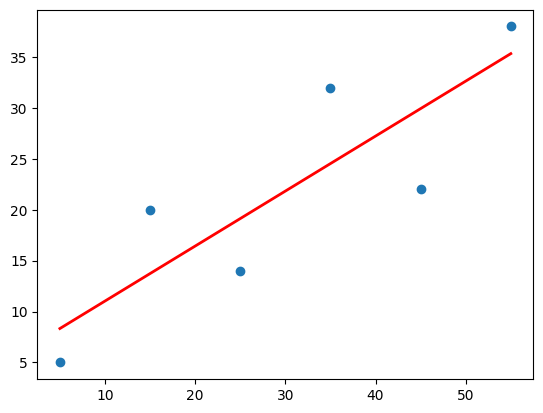

In [ ]:
# Предсказание
y_pred = lin_reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

In [ ]:
# оценим получившийся результат
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

Mean Absolute Error: 5.466666666666666
Mean Squared Error: 33.75555555555555
R2 score: 0.7158756137479542


In [ ]:
y_pred_2 = np.full(6, y.mean())

y_pred_2

array([21.83333333, 21.83333333, 21.83333333, 21.83333333, 21.83333333,
       21.83333333])

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y, y_pred_2))
print('Mean Squared Error:', mean_squared_error(y, y_pred_2))
print('R2 score:', r2_score(y, y_pred_2))

Mean Absolute Error: 8.833333333333334
Mean Squared Error: 118.80555555555554
R2 score: 0.0


### Пример на данных

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by - town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
df.shape

(506, 14)

In [ ]:
# Вектор признаков
X = df.drop(columns=['medv', 'id'])

# Вектор целевой переменной
Y = df['medv']

Одна из целей построения алгоритмов машинного обучения, постоить такую модель, которая будет способная также хорошо работать с новыми данными, которых она не видела до этого, как и с теми данными на которых обучалась.

Это называется **обобщающей способностью** моделей.

**Обобщающая способность** — это способность аналитической модели, построенной на основе машинного обучения (нейронной сети, дерева решений, карты Кохонена и др.) выдавать правильные результаты не только для примеров, участвовавших в процессе обучения, но и для любых новых, которые не участвовали в нем.

Именно поэтому при обучении модели, существующий набор данных разделяют на подвыборки:
- **тренировочную (train)** - набор данных на которых мы обучаем нашу модель
- **тестовую (test)** - это набор данных, которые мы не использовали для обучения нашей модели, т. е. это данные которые не видела наша модель. Набор данных используется для тестирования и оценки модели.

***Таким образом разделение данных на обучающую и тестовую выборки позволяет имитировать работу модели на новых/неизвестных данных.***

К тому же при использовании одних и тех же данных может возникнуть **Переобучение** — это термин, используемый для описания того, когда модель изучила эту взаимосвязь «слишком хорошо» для обучающих данных.

Под «слишком хорошо» мы подразумеваем скорее то, что он слишком близко изучил взаимосвязь — что он видит больше тенденций/корреляций/связей, чем существует на самом деле.

**Существует две основных стратегий разделения данных на подвыборки:**
1. отложенная выборка: разделение данных на две части (train и test)
2. Кроссвалидация

#### Отложенная выборка

Данный подход эффективен при большом количестве данных, при маленьких размерах выборки может возникнуть множество различных проблем.

В библиотеки sklearn реализован метод позволяющий осуществить данное разбиение:

`from sklearn.model_selection import train_test_split`

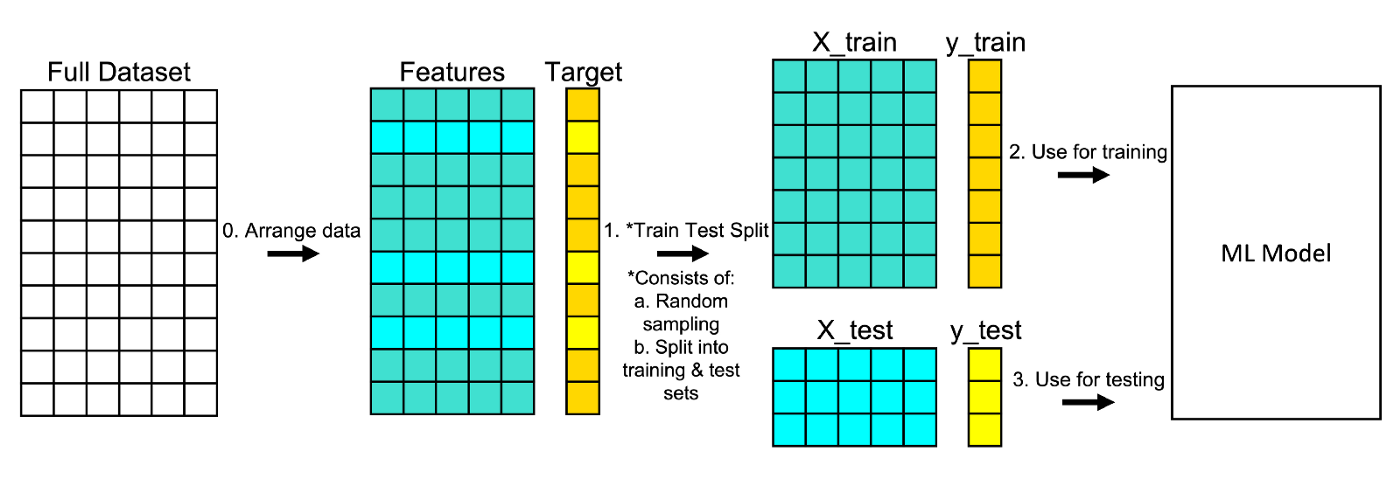

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (354, 13), (354,)
Test dataset size: (152, 13), (152,)


In [ ]:
# импортируем необходмимые библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Создадим модель линейной регрессии
model = LinearRegression()

# Обучим линейную регрессию на тренировочном стандартизированном наборе данных
# На этапе обучения алгоритм рассчитывает веса признаков и строит линейное уравнение регрессии
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Веса всех признаков (w1, ..., w13): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1, ..., w13):  [-8.05022152e-02  7.08749851e-02 -4.65869724e-02  3.27795245e+00
 -2.03621884e+01  2.90760804e+00 -1.17230778e-03 -1.97573086e+00
  3.45741837e-01 -1.26922524e-02 -8.85767983e-01  1.08401671e-02
 -5.45957954e-01]
Свободный коэффицент уравнения w0: 44.31037249916875


y = 44 + -8.05*10^-2*crim+  ///

In [ ]:
# Создадим массив названия признаков
features = X_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
4,-20.362188,nox
7,-1.975731,dis
10,-0.885768,ptratio
12,-0.545958,lstat
0,-0.080502,crim
2,-0.046587,indus
9,-0.012692,tax
6,-0.001172,age
11,0.010840,b
1,0.070875,zn


Предскажем результат для тех же самых тренировочных данных и оценим наш алгоритм линейной регрессии с помощью различных оценок регрессии:
1. **Средняя абсолютная ошибка (MAE)** – это среднее значение абсолютного значения ошибок. Он рассчитывается как:

$MAE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|$

где $n$ - количество наблюдений

2. **Среднеквадратичная ошибка (MSE)** – это среднее значение квадратов ошибок и вычисляется как:

$MSE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|^2$

где $n$ - количество наблюдений

В идеальном случае MAE и MSE равны 0.

In [ ]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 3.7762974007308805
Mean Squared Error: 25.752071138159284
R2 score: 0.734629239264335


Вывод:

### Пример того, почему регрессия "Линейная"

In [ ]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]).reshape((-1, 1))
y = np.array([16, 9, 4, 1, 0, 1, 4, 9, 16])

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(x, y)

LinearRegression()

In [ ]:
y_pred = model1.predict(x)

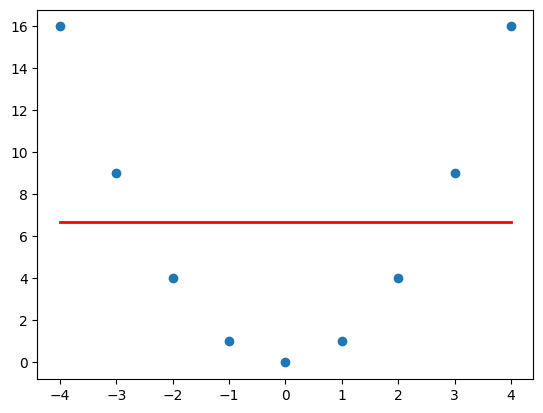

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

Mean Absolute Error: 5.185185185185186
Mean Squared Error: 34.22222222222222
R2 score: 0.0


### Ограничения линейной регрессии

1. Линейная связь : линейная регрессия требует, чтобы связь между независимыми и зависимыми переменными была линейной.
2. Выбросы: также важно проверять наличие выбросов, поскольку линейная регрессия чувствительна к наличию выбросов.
3. Независимость: Независимость предполагает, что независимые переменные в модели не коррелируют и не связаны друг с другом. Это предположение необходимо для того, чтобы линейная регрессия была верной.
4. Нет мультиколлинеарности: Мультиколлинеарность — еще одно слово, которое обманчиво прямолинейно. Он описывает статистическое явление, когда два или более предикторов в модели множественной регрессии сильно коррелируют друг с другом. Таким образом, предположение об отсутствии мультиколлинеарности утверждает, что не должно быть никакой связи между предикторами в модели множественной линейной регрессии. Почему нет? Потому что это может привести к нестабильному показателю взаимосвязи между предиктором и переменными выхода/отклика, что затруднит интерпретацию индивидуального влияния каждого предиктора на результат.